## Segmenting and Clustering Neighbourhoods in Toronto

The project includes scraping the Wikipedia page for the postal codes of Canada and then process and clean the data for the clustering. The clustering is carried out by K Means and the clusters are plotted using the Folium Library. 
The Boroughs containing the name 'Toronto', in it are first scraped plotted and then clustered and plotted again.

All the 3 phases of this project i.e. web scraping, Data cleansing and clustering based on Geo-coordinates all are implemented in the same notebook for the ease of evaluation.

Installing and Importing the required Libraries

In [1]:
#importing BeautifulSoup library
from bs4 import BeautifulSoup

#getting html of required website and converting it as a BeautifulSoup object
import requests

import folium

import pandas as pd

import numpy as np

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

soup=BeautifulSoup(source,'lxml')

print(soup.title)

<title>List of postal codes of Canada: M - Wikipedia</title>


In [3]:
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

Postal Code,Community,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [4]:
dfs = pd.read_html(tab)

In [5]:
df = dfs[0]

In [6]:
df.columns = ["Postcode","Borough","Neighbourhood"]

In [7]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [8]:
# Dropping the rows where Borough is 'Not assigned'
df = df[df.Borough != 'Not assigned']

In [9]:
# Combining the neighbourhoods with same Postalcode
df2 = df.groupby(['Postcode','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)

# Replacing the name of the neighbourhoods which are 'Not assigned' with names of Borough
df2['Neighbourhood'] = np.where(df2['Neighbourhood'] == 'Not assigned',df2['Borough'], df2['Neighbourhood'])

df2

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [10]:
# Shape of data frame
df2.shape

(103, 3)

## Importing the csv file conatining the latitudes and longitudes for various neighbourhoods in Canada

In [11]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


## Merging the two tables for getting the Latitudes and Longitudes for various neighbourhoods in Canada

In [12]:
lat_lon.rename(columns={'Postal Code':'Postcode'},inplace=True)

df3 = pd.merge(df2,lat_lon,on='Postcode')
df3.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


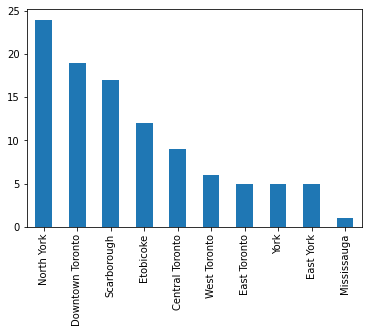

In [13]:
df3.Borough.value_counts().plot(kind="bar")

# The notebook from here includes the Clustering and the plotting of the neighbourhoods of Canada which contain Toronto in their Borough

## Getting all the rows from the data frame which contains Toronto in their Borough.


In [14]:
Toronto_df = df3[df3['Borough'].str.contains('Toronto',regex=False)]

In [15]:
Toronto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 2 to 100
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Postcode       39 non-null     object 
 1   Borough        39 non-null     object 
 2   Neighbourhood  39 non-null     object 
 3   Latitude       39 non-null     float64
 4   Longitude      39 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.8+ KB


In [16]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighbourhood in zip(Toronto_df['Latitude'],Toronto_df['Longitude'],Toronto_df['Borough'],
                                         Toronto_df['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto


## Using KMeans clustering for the clsutering of the neighbourhoods


In [17]:
toronto_clustering = Toronto_df.drop(['Postcode','Borough','Neighbourhood'],1)

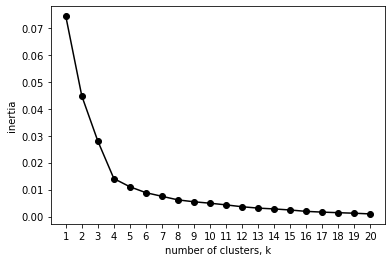

In [18]:
ks = range(1, 21)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(toronto_clustering)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [19]:
k = 4

kmeans = KMeans(n_clusters = k,random_state = 42).fit(toronto_clustering)

Toronto_df['Cluster_Labels'] = kmeans.labels_

E:\work_table\conda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [20]:
Toronto_df.Cluster_Labels.value_counts()

0    19
3     8
2     7
1     5
Name: Cluster_Labels, dtype: int64

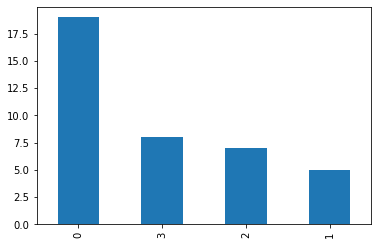

In [21]:
Toronto_df.Cluster_Labels.value_counts().plot(kind="bar")

In [22]:
# create map
map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(Toronto_df['Latitude'], Toronto_df['Longitude'], Toronto_df['Neighbourhood']
                                            , Toronto_df['Cluster_Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## The map might not be visible on Github. Check out the README for the map.